In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML


In [2]:
ds=xr.open_dataset('/work/mjh/from_gaea/ALE_zstar_IC.nc')

(0, 50)

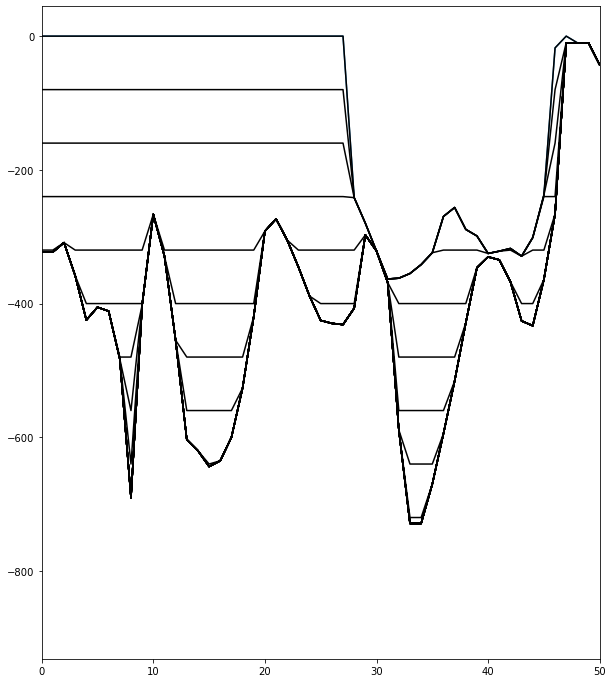

In [3]:
fig=plt.figure(1,figsize=(10,12))
eta_slice=ds['eta'].isel(lonh=slice(30,31)).data
#print(eta_slice.shape)
plt.plot(np.squeeze(eta_slice[0,0,:]))
for k in np.arange(eta_slice.shape[1]):
    plt.plot(np.squeeze(eta_slice[0,k,:]),color='k')
plt.xlim(0,50)

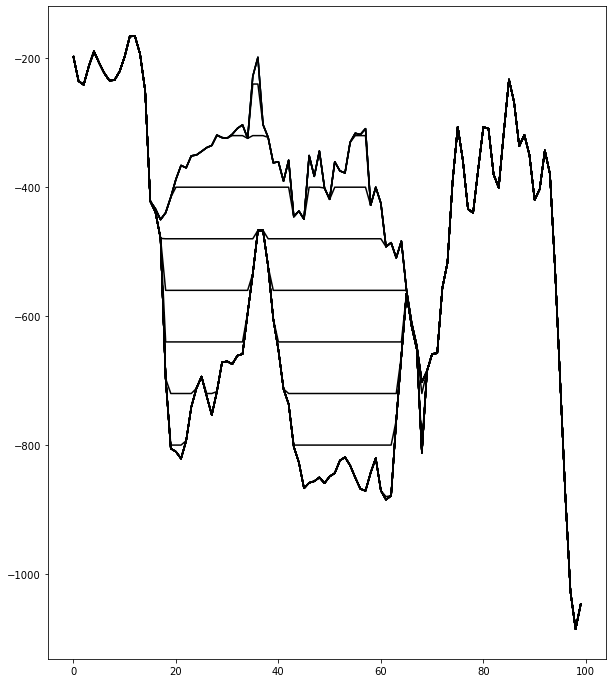

In [4]:
fig=plt.figure(1,figsize=(10,12))
eta_slice=ds['eta'].isel(lath=slice(35,36)).data
#print(eta_slice.shape)
plt.plot(np.squeeze(eta_slice[0,0,:]))
for k in np.arange(eta_slice.shape[1]):
    plt.plot(np.squeeze(eta_slice[0,k,:]),color='k')
#plt.xlim(0,50)

In [5]:
dsm=xr.open_dataset('/work/mjh/from_gaea/mom_layer.nc')
dsp=xr.open_dataset('/work/mjh/from_gaea/prog_layer.nc')
dsbtm=xr.open_dataset('/work/mjh/from_gaea/bt_mom_layer.nc')

/net3/mjh/local/anaconda3/envs/pangeo/lib/python3.8/site-packages/xarray/coding/times.py:517: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [6]:
PFuBT=dsbtm['PFuBT'].data
CoruBT=dsbtm['CoruBT'].data
ubtForce=dsbtm['ubtforce'].data
u_accel_bt=dsbtm['u_accel_bt'].data

PFu=dsm['PFu'].isel(zl=slice(0,1)).data
CAu=dsm['CAu'].isel(zl=slice(0,1)).data
du_dt_visc=dsm['du_dt_visc'].isel(zl=slice(0,1)).data
du_dt=dsm['dudt'].isel(zl=slice(0,1)).data
Htot=dsp['h'].sum(axis=1)
h=dsp['h'].isel(zl=slice(0,1)).data

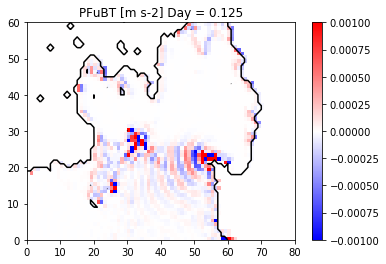

In [7]:
plt.pcolormesh(np.squeeze(PFuBT),vmin=-.001,vmax=.001,cmap=plt.cm.bwr);plt.colorbar()
plt.contour(np.squeeze(Htot),[0.,0.1],colors='k')
tit=plt.title('PFuBT [m s-2] Day = 0.125')
xl=plt.xlim(0,80)
yl=plt.ylim(0,60)

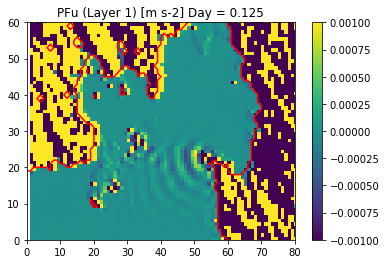

In [8]:
plt.pcolormesh(np.squeeze(PFu),vmin=-.001,vmax=.001);plt.colorbar()
plt.contour(np.squeeze(Htot),[0.,0.1],colors='r')
tit=plt.title('PFu (Layer 1) [m s-2] Day = 0.125')
xl=plt.xlim(0,80)
yl=plt.ylim(0,60)

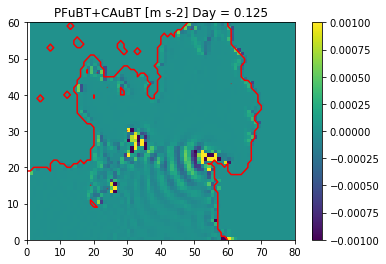

In [9]:
plt.pcolormesh(np.squeeze(PFuBT+CoruBT),vmin=-.001,vmax=.001);plt.colorbar()
plt.contour(np.squeeze(Htot),[0.,0.1],colors='r')
tit=plt.title('PFuBT+CAuBT [m s-2] Day = 0.125')
xl=plt.xlim(0,80)
yl=plt.ylim(0,60)

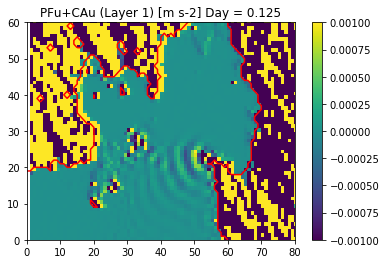

In [10]:
plt.pcolormesh(np.squeeze(PFu+CAu),vmin=-.001,vmax=.001);plt.colorbar()
plt.contour(np.squeeze(Htot),[0.,0.1],colors='r')
tit=plt.title('PFu+CAu (Layer 1) [m s-2] Day = 0.125')
xl=plt.xlim(0,80)
yl=plt.ylim(0,60)

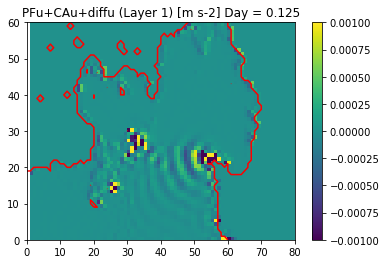

In [11]:
plt.pcolormesh(np.squeeze(PFu+CAu+du_dt_visc),vmin=-.001,vmax=.001);plt.colorbar()
tit=plt.title('PFu+CAu+diffu (Layer 1) [m s-2] Day = 0.125')
plt.contour(np.squeeze(Htot),[0.,0.1],colors='r')
xl=plt.xlim(0,80)
yl=plt.ylim(0,60)

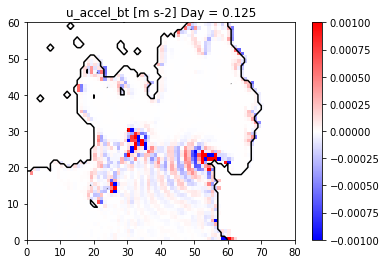

In [12]:
plt.pcolormesh(np.squeeze(u_accel_bt),vmin=-.001,vmax=.001,cmap=plt.cm.bwr);plt.colorbar()
tit=plt.title('u_accel_bt [m s-2] Day = 0.125')
plt.contour(np.squeeze(Htot),[0.,0.1],colors='k')
xl=plt.xlim(0,80)
yl=plt.ylim(0,60)

(1, 1, 164, 100)
(1, 1, 164, 99)


(0, 60)

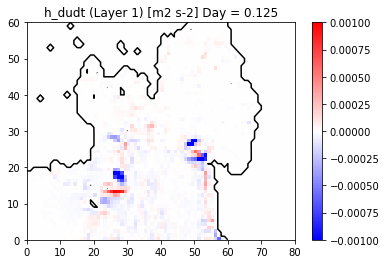

In [174]:

h_u=0.5*(h[:,:,:,:-1]+h[:,:,:,1:])
print(h.shape)
print(h_u.shape)
plt.pcolormesh(np.squeeze(h_u*du_dt[:,:,:,1:-1]),vmin=-.001,vmax=.001,cmap=plt.cm.bwr);plt.colorbar()
#plt.title('dudt (sumz) [m s-1] Day = 0.125')
plt.title('h_dudt (Layer 1) [m2 s-2] Day = 0.125')
plt.contour(np.squeeze(Htot),[0.,0.1],colors='k')
plt.xlim(0,80)
plt.ylim(0,60)


In [106]:
dsm

/net3/mjh/local/anaconda3/envs/pangeo/lib/python3.8/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


<xarray.Dataset>
Dimensions:     (nv: 2, time: 1, xh: 100, xq: 101, yh: 164, yq: 165, zl: 25)
Coordinates:
  * xq          (xq) float64 257.4 257.4 257.4 257.4 ... 255.9 255.9 255.8 255.8
  * yh          (yh) float64 -74.51 -74.51 -74.52 ... -74.89 -74.89 -74.89
  * zl          (zl) float64 40.0 120.0 200.0 ... 1.8e+03 1.88e+03 1.96e+03
  * time        (time) object 0001-01-01 01:30:00
  * nv          (nv) float64 1.0 2.0
  * xh          (xh) float64 257.5 257.4 257.4 257.4 ... 255.9 255.9 255.9 255.9
  * yq          (yq) float64 -74.51 -74.51 -74.52 ... -74.89 -74.89 -74.89
Data variables: (12/14)
    dudt        (time, zl, yh, xq) float32 nan 2.495e-07 ... -2.172e-20 nan
    dvdt        (time, zl, yq, xh) float32 ...
    CAu         (time, zl, yh, xq) float32 nan -2.196e-07 ... 2.69e-20 nan
    CAv         (time, zl, yq, xh) float32 ...
    PFu         (time, zl, yh, xq) float32 nan -8.282e-07 ... -0.03755 nan
    PFv         (time, zl, yq, xh) float32 ...
    ...          ...
    diffu       (time, zl, yh, xq) float32 ...
    diffv       (time, zl, yq, xh) float32 ...
    average_T1  (time) object ...
    average_T2  (time) object ...
    average_DT  (time) timedelta64[ns] ...
    time_bnds   (time, nv) timedelta64[ns] ...
Attributes:
    NumFilesInSet:  1
    title:          MOM Experiment
    grid_type:      regular
    grid_tile:      N/A

(0, 60)

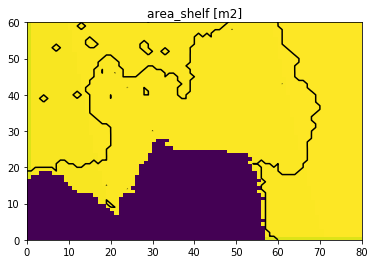

In [177]:
area_shelf=dsp['area_shelf_h'].data
plt.pcolormesh(np.squeeze(area_shelf))
plt.title('area_shelf [m2]')
plt.contour(np.squeeze(Htot),[0.,0.1],colors='k')
plt.xlim(0,80)
plt.ylim(0,60)
